In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [17]:
with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls['secoora']

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://erddap.secoora.org/erddap


Pull in the processed inventory

In [14]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/SECOORA.xlsx')
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,SECOORA,SHP,SHPF1,Shell Point,Meteorological and water level station,30.058,-84.29,fixed,"11/2000 - 1/2007, ...",Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",NaN
1,SECOORA,FHP,FHPF1,Fred Howard Park,Meteorological and water level station,28.153,-82.801,fixed,"7/2004 -9/2008, ...",Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",NaN
2,SECOORA,APK,ARPF1,Aripeka,Meteorological and water level station,28.433,-82.667,fixed,6/2002 - present,Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",Removed the CTD
3,SECOORA,BCP,BGCF1,Big Carlos Pass,Meteorological and water level station,26.404,-81.881,fixed,8/2004 - present,Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",Acoustic receiver deployed on mooring w/ Jim L...
4,SECOORA,Clam Bayou,CLBF1,Clam Bayou,"Meteorological, water level, and water quality...",27.736,-82.686,fixed,5/2009 - present,Y,SECOORA,Yp,USF,Academic,"USF, YSI-Xylem",USF,"air_pressure, air_temperature, relative_humidi...",station also collects blue green algae concent...
5,SECOORA,C12,42022,WFS Central Buoy,50m isobath,27.505,-83.741,moored_buoy,1997-07-28 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",in water microcat CTDs (at 20m and 30 m) are i...
6,SECOORA,C13,42023,WFS South Buoy,50m isobath,26.01,-83.086,moored_buoy,1999-09-01 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",in water microcat CTDs (at 20m and 30 m) are i...
7,SECOORA,C10,42013,WFS Central Buoy,25m isobath,27.173,-82.924,moored_buoy,1998-09-14 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",in water microcat CTDs (at 10m and 19 m) are i...
8,SECOORA,C22,42026,WFS Pressure Point Buoy,70m isobath,25.171,-83.475,moored_buoy,2019-06-27 00:00:00,Y,NAS GRP,N,USF,Academic,USF,USF,"air_pressure, air_temperature, relative_humidi...",in water microcat CTDs (at 10m and 65 m) are i...
9,SECOORA,C11,NaN,WFS 20m Bottom Mount,20m isobath,27.21,-82.82,bottom_mount,1998-07-13 00:00:00,Y,SECOORA,Yf,USF,Academic,USF,USF,"sea_water_practical_salinity (bottom 20 m), se...",Non real time bottom mount mooring.


Search the ERDDAP server for a station of interest

Dataset edu_usf_marine_comps_fhpf1
Duration: 2019-03-01T00:00:00Z - 2022-08-12T15:54:00Z


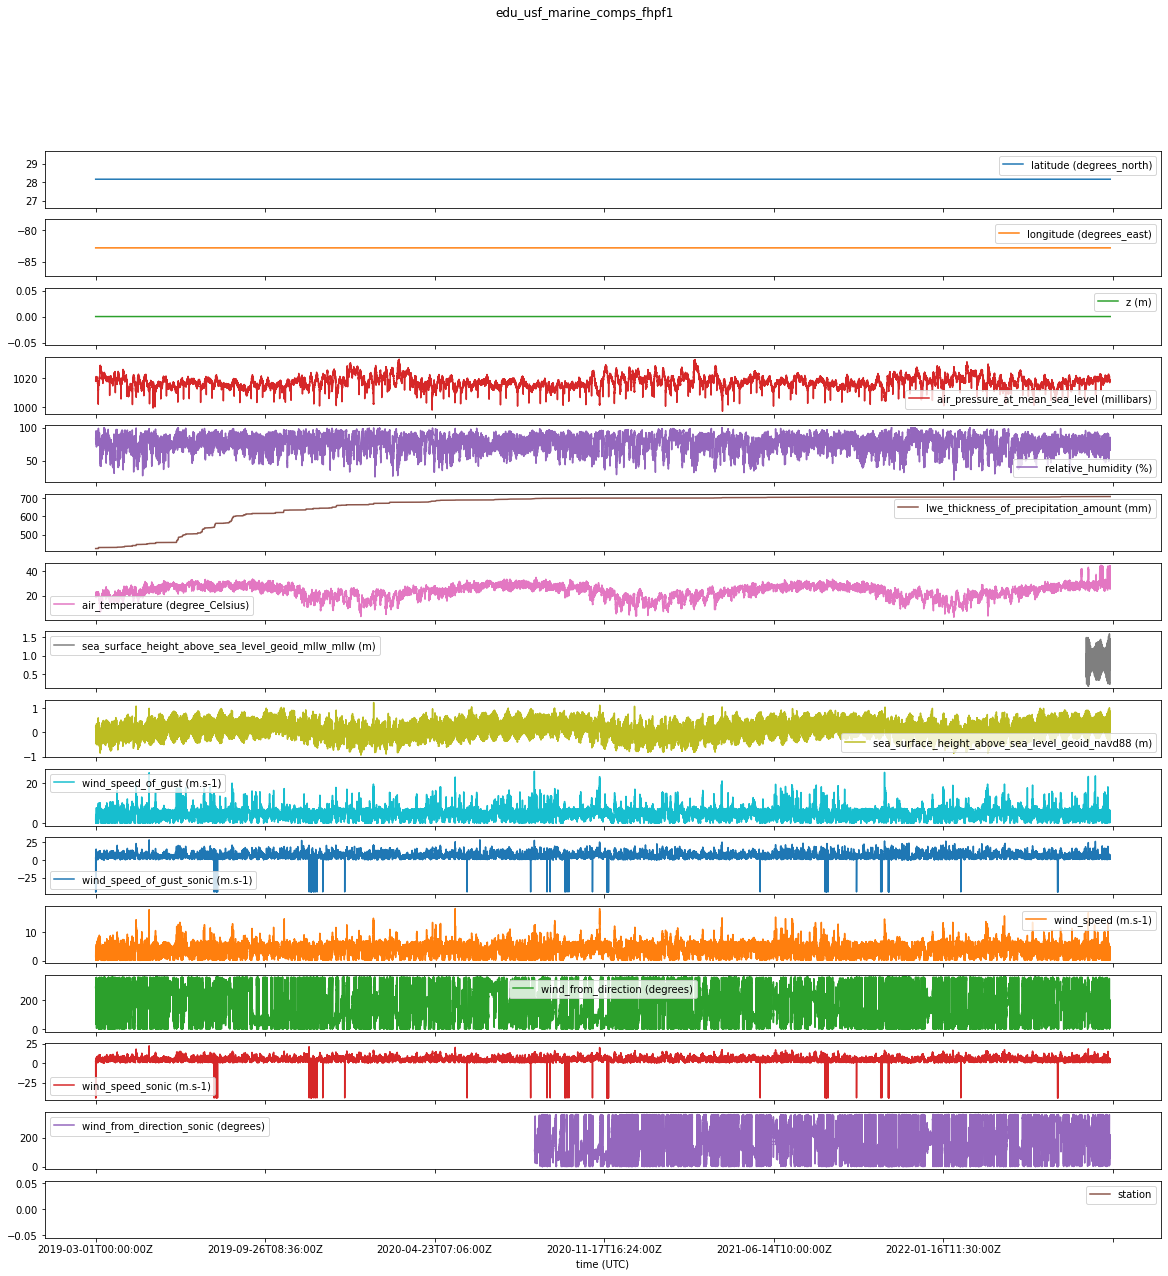

In [24]:
df_wf = df[df['Station Long Name'] == 'Fred Howard Park']

search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

resp = pd.read_csv(search_url)

resp['Dataset ID']

Try and rip through all `Station ID` at RA erddap

In [45]:
for station in df['Station ID']:
    
    try:
        search_url = e.get_search_url(search_for=station, response="csv")
        resp = pd.read_csv(search_url)
        print("Found \"%s\": %s" % (station,resp['Dataset ID'].values.tolist()))
    except:
        print('no dataset matching \"%s\"' % station)
        station_long_name = df.loc[df['Station ID'] == station,'Station Long Name'].values.tolist()[0]
        print('searching \"station long name\" = %s' % station_long_name)
        try:
            search_url = e.get_search_url(search_for=station_long_name, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (station_long_name,resp['Dataset ID'].values.tolist()))
        except:
            print("No dice...")
        
    print("\n")

Found "SHP": ['edu_usf_marine_comps_shpf1', 'gov_noaa_water_shpf1']


Found "FHP": ['edu_usf_marine_comps_fhpf1']


Found "APK": ['edu_usf_marine_comps_arpf1']


no dataset matching "BCP"
searching "station long name" = Big Carlos Pass
Found "Big Carlos Pass": ['edu_usf_marine_comps_1407d550', 'edu_usf_marine_comps_bgcf1']


Found "Clam Bayou": ['edu_usf_marine_comps_clb', 'clbf1-clb-water-quality-clam-']


Found "C12": ['edu_usf_marine_comps_c12', 'c12-historic-currents-water-temp', 'c12-water-velocity-wfs-central-b']


Found "C13": ['c13-historic-currents-water-temp', 'c13-water-velocity-wfs-south-buo', '42023-c13-wfs-south-buoy-50m-', 'pelagia_20180910t0000']


Found "C10": ['edu_usf_marine_comps_c10', 'c10-historic-currents-water-temp', 'c10-water-velocity-wfs-central-b']


Found "C22": ['42026-c22-currents-loop-curre', '42026-c22-loop-current-pressu']


Found "C11": ['c11']


Found "C15": ['c15']


no dataset matching "OA sensors Grays Reef mooring"
searching "station long name" =

Pull out some information about the dataset(s) and make a plot

Dataset edu_usf_marine_comps_fhpf1
Duration: 2021-01-01T00:00:00Z - 2022-08-12T15:54:00Z


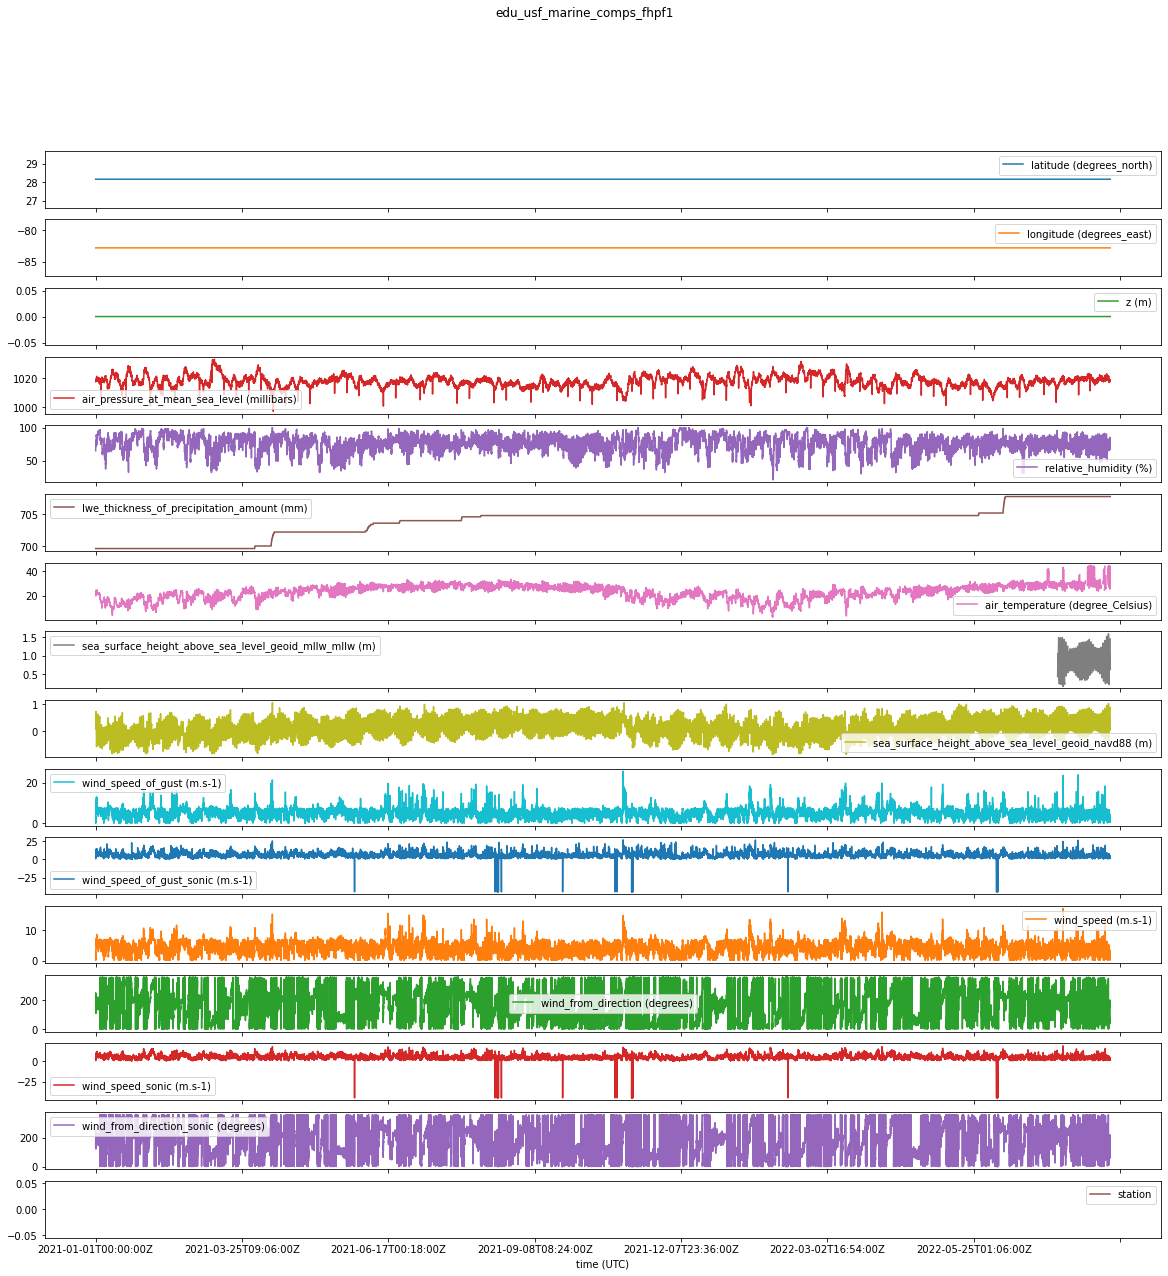

In [26]:
for index, row in resp.iterrows():
    #print(row.item())
    e.dataset_id = row['Dataset ID']
    
    e.constraints = {
         "time>=": "2021-01-01"
    }

    df_data = e.to_pandas(parse_dates=True)

    # drop qc vars
    cols = [c for c in df_data.columns if 'qc' not in c]
    cols = [c for c in cols if 'QARTOD' not in c]

    df_data = df_data[cols]

    # set index for plotting
    df_data = df_data.set_index(df_data['time (UTC)'])

    # plot
    df_data.plot(subplots=True, title=title,figsize=(20,20))

    start_time = df_data['time (UTC)'].min()
    end_time = df_data['time (UTC)'].max()

    print('Dataset %s' % e.dataset_id)
    print('Duration: %s - %s' % (start_time, end_time))